In [2]:
# basic imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

MrBeast Youtube Video Titles - Dollar Giveaway !!
Jimmy Donaldson also known as MrBeast, is an American YouTuber, internet personality, businessman, and philanthropist. He has been credited with pioneering a genre of YouTube videos that center on expensive stunts.

Interesting Analysis to find:
How many Dollars have MrBeast spent so far?

In [5]:
# loading our data labels
data = pd.read_csv('MrBeast_titles.csv')

In [4]:
data.describe()

,active_since_days,duration_seconds,total_views,num_chars,num_words,num_punctuation,num_words_uppercase,num_words_lowercase,num_stopwords,avg_word_len,contain_digits,startswith_digits,title_sentiment
count,744.000000,744.000000,7.440000e+02,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,1716.247312,1254.930108,2.085411e+07,38.930108,6.715054,2.123656,0.818548,0.422043,1.866935,5.971264,0.452957,0.068548,0.037409
std,834.641697,7187.372151,3.393506e+07,14.790796,2.684784,1.975156,1.493145,1.235129,1.513433,1.245005,0.498117,0.252855,0.342894
min,0.000000,0.000000,0.000000e+00,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,-1.000000
25%,1095.000000,183.750000,3.783650e+04,30.000000,5.000000,1.000000,0.000000,0.000000,1.000000,5.166667,0.000000,0.000000,0.000000
50%,1825.000000,274.500000,2.146900e+05,39.000000,7.000000,2.000000,0.000000,0.000000,2.000000,5.750000,0.000000,0.000000,0.000000
75%,2190.000000,760.000000,3.413867e+07,46.000000,8.000000,3.000000,1.000000,0.000000,3.000000,6.500000,1.000000,0.000000,0.177083
max,3285.000000,86400.000000,1.681452e+08,149.000000,26.000000,17.000000,9.000000,11.000000,12.000000,15.000000,1.000000,1.000000,1.000000


In [7]:
# checking some insights on dataset

len(data)

744

In [8]:
data.head()

,video_id,title,active_since_days,duration_seconds,total_views,num_chars,num_words,num_punctuation,num_words_uppercase,num_words_lowercase,num_stopwords,avg_word_len,contain_digits,startswith_digits,title_sentiment
0,v=QbJJwaVdgIs,I Got Hunted By The Military,4,662,34951603,28,6,0,1,0,3,4.666667,0,0,-0.100
1,v=0e3GPea1Tyg,"$456,000 Squid Game In Real Life!",10,1500,168145214,33,6,3,0,0,1,5.500000,1,1,-0.075
2,v=LeYsRMZFUq0,"I Gave People $1,000,000 But ONLY 1 Minute To ...",330,858,91045927,55,11,4,2,0,4,5.000000,1,0,0.000
3,v=qIsgdOVGA04,"Last To Take Hand Off Lamborghini, Keeps It",30,900,51208369,43,8,1,0,0,3,5.375000,0,0,0.000
4,v=zxYjTTXc-J8,"Last To Leave Circle Wins $500,000",90,1140,91940786,34,6,2,0,0,1,5.666667,1,0,0.150


In [9]:
data

,video_id,title,active_since_days,duration_seconds,total_views,num_chars,num_words,num_punctuation,num_words_uppercase,num_words_lowercase,num_stopwords,avg_word_len,contain_digits,startswith_digits,title_sentiment
0,v=QbJJwaVdgIs,I Got Hunted By The Military,4,662,34951603,28,6,0,1,0,3,4.666667,0,0,-0.100000
1,v=0e3GPea1Tyg,"$456,000 Squid Game In Real Life!",10,1500,168145214,33,6,3,0,0,1,5.500000,1,1,-0.075000
2,v=LeYsRMZFUq0,"I Gave People $1,000,000 But ONLY 1 Minute To ...",330,858,91045927,55,11,4,2,0,4,5.000000,1,0,0.000000
3,v=qIsgdOVGA04,"Last To Take Hand Off Lamborghini, Keeps It",30,900,51208369,43,8,1,0,0,3,5.375000,0,0,0.000000
4,v=zxYjTTXc-J8,"Last To Leave Circle Wins $500,000",90,1140,91940786,34,6,2,0,0,1,5.666667,1,0,0.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,v=7qj3nuF9Dzw,Most Epic minecraft skin EVER (Psy),2920,30,415592,36,6,2,1,2,1,6.000000,0,0,0.300000
740,v=Y74b7WlcEpk,More birds IN MINECRAFT!!,2920,126,502514,25,4,2,2,1,2,6.250000,0,0,0.781250
741,v=Z8nEEdXTaX0,Boxy item mod Minecraft. EPIC,2920,90,568947,30,5,1,1,2,0,6.000000,0,0,0.150000
742,v=jP82d277Cc8,Harry Potter Mod In Minecraft! EPIC MUST SEE M...,3285,239,2007602,51,9,4,4,0,1,5.666667,0,0,0.246875


In [14]:
len(data["video_id"])

744

In [15]:
len(data["title"])

744

In [16]:
title = data["title"]
np.unique(title)

array(['"Beast" Channel Trailer', '#1 MOST INSANE MAGNET LIFE HACK EVER',
       '$10,000 Games Of Rock Paper Scissors',
       '$100 GIVEAWAY PRANK (NO WEAPONS INVOLVED)',
       '$10000 Ice Sculpture Vs Flame', '$200,000 Youtuber Battle Royale',
       '$250,000 Influencer Rock, Paper, Scissors Tournament',
       '$300,000 Influencer Trivia Tournament!',
       '$456,000 Squid Game In Real Life!',
       '$50,000 Game Of Extreme Hide And Seek - Challenge',
       '$60,000 Extreme Hide And Seek - Challenge',
       '$70,000 Extreme Hide And Seek - Challenge',
       "10 Things You DIDN'T Know About Youtube!", '10,000 QNA With MUM',
       '100 LAYERS OF SARAN WRAP + TOILET PAPER!!',
       '100,000 Player Building Challenge!', '100,000 SUBSCRIBERS.EXE',
       '100k Subs With No Videos????', '100th VIDEO SPECIAL!',
       '1080p FREE TO USE BLACK OPS 3 GAMEPLAY',
       '15,000 Subscribers Speedart!', '1500',
       "18th Birthday QNA - Mom's Hair Dryer Age?", '1k Subs',
       '2,00

In [17]:
len(np.unique(title))

721

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

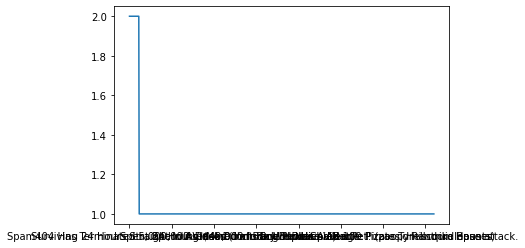

In [20]:
title.value_counts().plot().bar(figsize=(20, 10))

<AxesSubplot:>

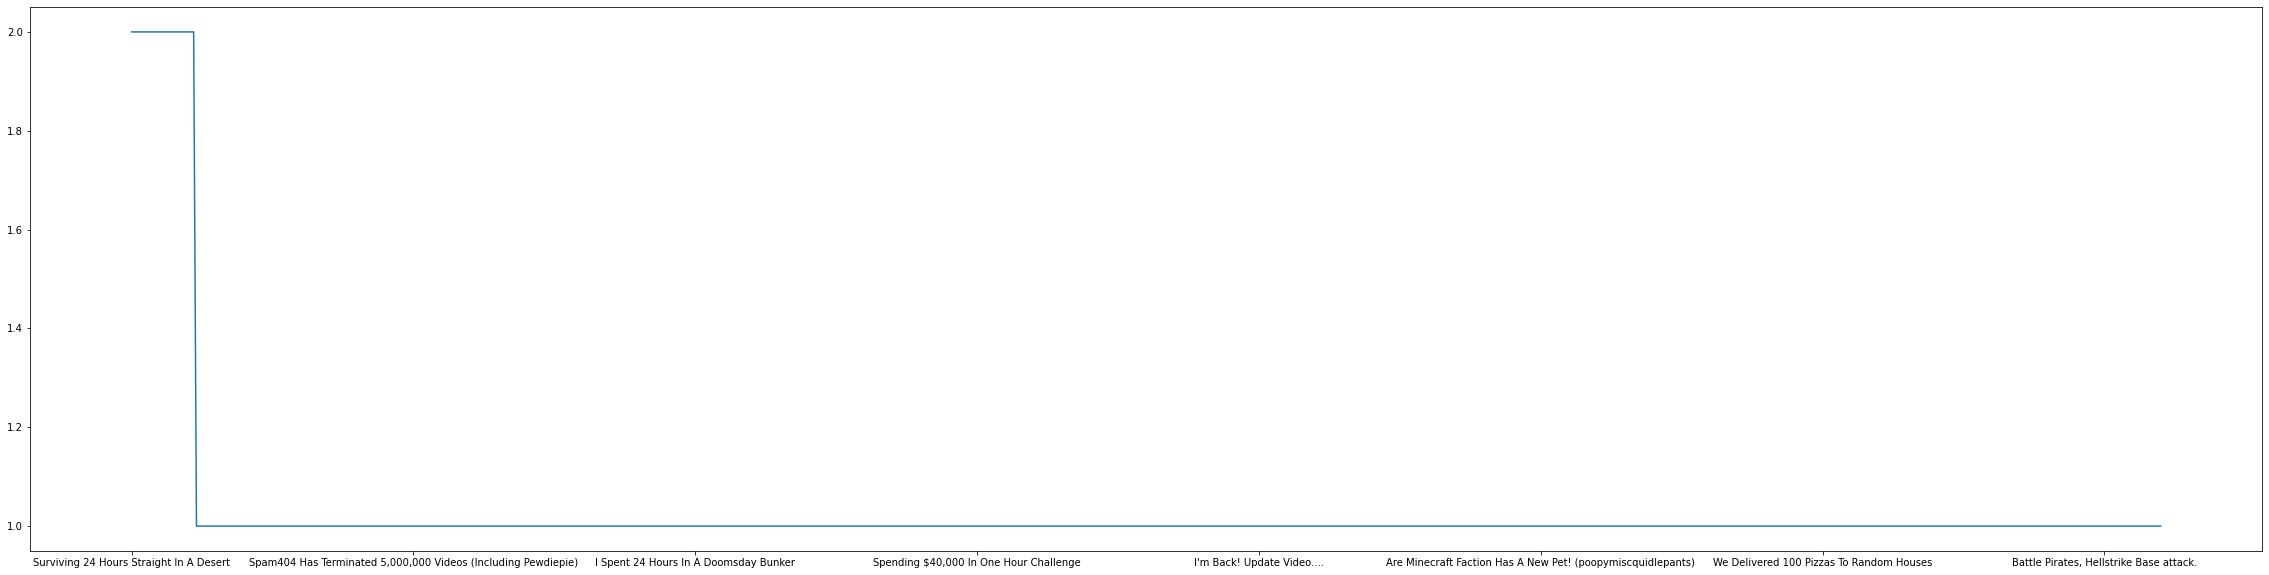

In [25]:
data["title"].value_counts().plot.line(figsize=(40, 10))

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   video_id             744 non-null    object 
 1   title                744 non-null    object 
 2   active_since_days    744 non-null    int64  
 3   duration_seconds     744 non-null    int64  
 4   total_views          744 non-null    int64  
 5   num_chars            744 non-null    int64  
 6   num_words            744 non-null    int64  
 7   num_punctuation      744 non-null    int64  
 8   num_words_uppercase  744 non-null    int64  
 9   num_words_lowercase  744 non-null    int64  
 10  num_stopwords        744 non-null    int64  
 11  avg_word_len         744 non-null    float64
 12  contain_digits       744 non-null    int64  
 13  startswith_digits    744 non-null    int64  
 14  title_sentiment      744 non-null    float64
dtypes: float64(2), int64(11), object(2)
memo

In [30]:
y = data["total_views", axis=True]

SyntaxError: invalid syntax (2546705190.py, line 1)

In [33]:
x = data.drop(["total_views"], axis=True)

In [34]:
x

,video_id,title,active_since_days,duration_seconds,num_chars,num_words,num_punctuation,num_words_uppercase,num_words_lowercase,num_stopwords,avg_word_len,contain_digits,startswith_digits,title_sentiment
0,v=QbJJwaVdgIs,I Got Hunted By The Military,4,662,28,6,0,1,0,3,4.666667,0,0,-0.100000
1,v=0e3GPea1Tyg,"$456,000 Squid Game In Real Life!",10,1500,33,6,3,0,0,1,5.500000,1,1,-0.075000
2,v=LeYsRMZFUq0,"I Gave People $1,000,000 But ONLY 1 Minute To ...",330,858,55,11,4,2,0,4,5.000000,1,0,0.000000
3,v=qIsgdOVGA04,"Last To Take Hand Off Lamborghini, Keeps It",30,900,43,8,1,0,0,3,5.375000,0,0,0.000000
4,v=zxYjTTXc-J8,"Last To Leave Circle Wins $500,000",90,1140,34,6,2,0,0,1,5.666667,1,0,0.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,v=7qj3nuF9Dzw,Most Epic minecraft skin EVER (Psy),2920,30,36,6,2,1,2,1,6.000000,0,0,0.300000
740,v=Y74b7WlcEpk,More birds IN MINECRAFT!!,2920,126,25,4,2,2,1,2,6.250000,0,0,0.781250
741,v=Z8nEEdXTaX0,Boxy item mod Minecraft. EPIC,2920,90,30,5,1,1,2,0,6.000000,0,0,0.150000
742,v=jP82d277Cc8,Harry Potter Mod In Minecraft! EPIC MUST SEE M...,3285,239,51,9,4,4,0,1,5.666667,0,0,0.246875


In [35]:
y = data["total_views"]

In [36]:
len(x), len(y)

(744, 744)

In [37]:
# create train and test datasets

# defining the random seed
np.random.seed(43)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [38]:
len(x_train), len(y_train)

(595, 595)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)  # Don't cheat - fit only on training data
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)  # apply same transformation to test data


ValueError: could not convert string to float: 'v=IDrS_TrjuK4'

In [40]:
x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [41]:
scaler.fit(x_train)  # Don't cheat - fit only on training data
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)  # apply same transformation to test data


ValueError: could not convert string to float: 'v=IDrS_TrjuK4'

In [42]:
data.isna().sum()

video_id               0
title                  0
active_since_days      0
duration_seconds       0
total_views            0
num_chars              0
num_words              0
num_punctuation        0
num_words_uppercase    0
num_words_lowercase    0
num_stopwords          0
avg_word_len           0
contain_digits         0
startswith_digits      0
title_sentiment        0
dtype: int64

In [43]:
data.dtypes

video_id                object
title                   object
active_since_days        int64
duration_seconds         int64
total_views              int64
num_chars                int64
num_words                int64
num_punctuation          int64
num_words_uppercase      int64
num_words_lowercase      int64
num_stopwords            int64
avg_word_len           float64
contain_digits           int64
startswith_digits        int64
title_sentiment        float64
dtype: object

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

features = ['video_id', 'title']
one_hot = OneHotEncoder()

transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  features)],
                                remainder='passthrough')

In [46]:
# now create our x again from transformer dataset

x_transformed = transformer.fit_transform(data)

x_transformed

<744x1458 sparse matrix of type '<class 'numpy.float64'>'
	with 8302 stored elements in Compressed Sparse Row format>

In [48]:
# let's do convert our x and y again with numeric features
x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.2)

In [49]:
# fit the model
scaler.fit(x_train)  # Don't cheat - fit only on training data


ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

In [50]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

In [52]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [57]:
model.score(x_train, y_train)

0.9999088171961549

In [58]:
model.score(x_test, y_test)

0.9999354427320334

In [60]:
data.shape

(744, 15)

# Evaluating our model


In [61]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [63]:
print(cross_val_score(model, x_transformed, y))

[0.92600848 0.99799015 0.99962736 0.99989197 0.99952744]


In [67]:
scores = np.mean(cross_val_score(model, x_transformed, y))

In [74]:
print("%0.2f accuracy with a standard deviation of %0.2f" % ((scores.mean()*100), scores.std()))

98.55 accuracy with a standard deviation of 0.00


In [76]:
y_preds = model.predict(x_test)

In [78]:
y_preds.dtype

dtype('float64')

In [80]:
# 2. ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
y_preds = model.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_preds)

import seaborn as sns
sns.heatmap(fpr, tpr)

ValueError: multiclass format is not supported

In [82]:
y_probs = model.predict(x_test)
y_probs

array([6.67722200e+04, 4.85369900e+04, 2.36208164e+07, 4.08586901e+07,
       7.40581462e+07, 2.40385400e+04, 1.11436370e+05, 4.97343500e+04,
       1.46032320e+05, 2.80352400e+04, 3.16859310e+07, 1.58086950e+05,
       1.14265350e+05, 4.07211588e+07, 8.96841700e+04, 7.27818041e+06,
       2.28918000e+04, 1.45155000e+04, 2.80131900e+04, 8.72295624e+07,
       5.76140800e+04, 1.03092220e+05, 3.91640099e+07, 8.09736800e+04,
       2.63978570e+07, 6.40909204e+07, 7.43240474e+07, 7.18979746e+07,
       2.07934900e+04, 3.97517327e+07, 7.67500900e+04, 2.50397700e+04,
       3.51563100e+04, 1.40737200e+04, 3.44627248e+07, 7.85241400e+04,
       5.99656600e+04, 3.64754700e+04, 1.65751300e+04, 1.47983047e+07,
       1.68103980e+05, 7.21697200e+04, 3.95810680e+05, 4.77147100e+04,
       3.56760860e+05, 2.17824521e+07, 1.74745228e+06, 1.17805678e+08,
       3.11018330e+05, 1.87055300e+04, 2.99803800e+04, 4.89151831e+07,
       4.67942399e+07, 5.93142600e+04, 3.58775200e+04, 4.63059300e+04,
      

In [85]:
y_probs_positive = y_probs[: , 1]
y_probs_positive
    

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [83]:
# Now checking the roc curve 
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

plt.plot(fpr, tpr);
plt.title('ROC Area Under Curve')
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.show();

NameError: name 'y_probs_positive' is not defined

In [86]:
y_probs.dtype

dtype('float64')

In [87]:
len(y_probs)

149

In [88]:
y_probs.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [89]:
type(y_probs)

numpy.ndarray

In [94]:
y_probs.ndim, y_test.ndim

(1, 1)

In [93]:
# 3. Confusion Metrix (where the model should confused)
from sklearn.metrics import confusion_matrix

conf_metrix = confusion_matrix(y_test, y_preds)
conf_metrix

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [95]:
from sklearn.metrics import r2_score
y_preds = model.predict(x_test)

r2_score(y_test, y_preds)

0.9999354427320334

In [96]:
# 2. mean absolute error
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

106877.61322147658

In [97]:
# 3. mean squared error
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_preds)

51874213386.18531

In [98]:
np.random.seed(43)
r2_score = cross_val_score(model, x, y, cv=5, scoring=None)
r2_score, np.mean(r2_score)

/home/fahad/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/fahad/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/fahad/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 327, in fit
    X, y = self._validate_data(
  File "/home/fahad/.local/lib/python3.9/site-packages/sklearn/base.py", line 576, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/fahad/.local/

(array([nan, nan, nan, nan, nan]), nan)